# Mayhew preprocessing and models on our dataset

In [1]:
import pandas as pd
from xgboost import XGBClassifier, cv
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import numpy as np

SEED=0

# Load the dataset
- Load data from excel sheet
- Set X (independent variables) and y (dependent variables) 

In [2]:
data_path = 'data/master_4Mayhew.xlsx'
df = pd.read_excel(data_path)
df.set_index('SMILES', inplace=True)
y=df['label'] # labels, independent variables
X=df.drop(['label'], axis=1) # features, dependent variables

df

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,label
SMILES,,,,,,,,,,,,,,,,,,,,,
C1=CC=C2C(=C1)C(=O)C(C2=O)(O)O,10.191572,9.610016,0,0,16.402096,2.535251,4.795559,16.402096,1.261700,3.521954,...,60.186518,178.026609,9.369822,209,23,72,89,5.506944,2.750000,False
C(=C(F)F)(C(F)(F)F)C(F)(F)F,8.786807,9.354315,0,0,11.264384,2.394170,4.788340,11.264384,0.938699,3.353751,...,43.053817,199.987226,16.665602,179,16,58,63,8.347222,2.444444,False
C1=C(C=C(C(=C1[N+](=O)[O-])O)[N+](=O)[O-])[N+](=O)[O-],11.877237,11.411786,0,0,18.380381,2.411142,4.822284,18.380381,1.148774,3.664511,...,48.280750,228.997099,12.052479,408,25,78,90,8.277778,3.555556,False
CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3,15.682318,12.964430,0,0,26.034025,2.456696,4.859289,26.034025,1.301701,3.935426,...,61.882766,284.071641,8.608232,726,36,106,126,6.277778,4.388889,False
C(C(C(F)(F)F)(F)Cl)(F)Cl,7.220990,7.794227,0,0,9.758256,2.380983,4.761966,9.758256,0.975826,3.172059,...,40.351995,201.937546,18.357959,108,15,48,54,7.236111,2.062500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCC(=O)OCC,5.766244,6.059284,0,0,10.383983,2.015316,4.030632,10.383983,1.153776,3.007982,...,35.041491,130.099380,5.656495,108,7,32,31,4.361111,2.416667,True
C=CCSS(=O)CC=C,5.766244,6.059284,0,0,10.383983,2.015316,4.030632,10.383983,1.153776,3.007982,...,35.041491,162.017307,8.527227,108,7,32,31,4.361111,2.416667,True
CCCC(=O)OCC(C)C,6.692130,6.855805,0,0,11.127090,2.052881,4.105762,11.127090,1.112709,3.123647,...,37.120200,144.115030,5.542886,143,8,38,37,5.222222,2.500000,True


# Split the dataset
- Split dataset into training and test set 
- Use equal proportions of odor/odorless class

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0) # 70% training and 30% test
percentage_odorless = y_train.value_counts()[False]/y_train.shape[0]
percentage_odor = 1 - percentage_odorless
print(f"Total number molecules in training set: {y_train.shape[0]}")
print(f"Odor: {y_train.value_counts()[True]}")
print(f"Odorless: {y_train.value_counts()[False]}")

print(f"\nTotal number molecules in test set: {y_test.shape[0]}")
print(f"Odor: {y_test.value_counts()[True]}")
print(f"Odorless: {y_test.value_counts()[False]}")

print(f"\nPercentage odorless {y_test.value_counts()[False]/y_test.shape[0]}")

Total number molecules in training set: 692
Odor: 492
Odorless: 200

Total number molecules in test set: 173
Odor: 123
Odorless: 50

Percentage odorless 0.28901734104046245


# Test Model 

In [4]:
def test_model(model, y_test, X_test, verbose=True):
    y_pred=model.predict(X_test)
    y_pred_probs=model.predict_proba(X_test)[:,1]
    
    if verbose:
        print("ROC_AUC (TEST):",metrics.roc_auc_score(y_test, y_pred_probs))
        print("\n\nCLASSIFICATION REPORT:\n",metrics.classification_report(y_test, y_pred))
        
        if hasattr(model, 'feature_importances_') and hasattr(X_test, 'columns'):
            feature_imp = pd.Series(model.feature_importances_,index=X_test.columns.values).sort_values(ascending=False)
            top_20 = feature_imp.nlargest(20)
            sns.barplot(x=top_20, y=top_20.index)
            plt.xlabel('Descriptor Importance Score')
            plt.ylabel('Descriptor')
            plt.title("Top descriptors")
            plt.show()
        
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probs)  
        
        #create ROC curve
        plt.plot(fpr,tpr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        
    return metrics.roc_auc_score(y_test, y_pred_probs) 

def test_model_cross_val(model, y_test, X_test, k=5, verbose=True):
    roc_auc_nans = cross_val_score(model, X_test, y_test, cv=k, scoring='roc_auc')
    print(f"AVERAGE CV={k} ROC_AUC (TEST): {np.mean(roc_auc_nans)}")
    print(f"AVERAGE CV={k} STD (TEST): {np.std(roc_auc_nans)}")

# Handle NaNs


In [5]:
from sklearn.impute import KNNImputer

def handleNaNsMayhew(X_tr, X_te, thresh=0.1): 
    nans = X.isna().mean(axis=0)
    # set threshold for percentage nans before we drop 
    X_thresh = nans[nans >= thresh]
    X_tr.drop(X_thresh.index, 
      axis=1, 
      inplace=True)
    X_te.drop(X_thresh.index, 
      axis=1, 
      inplace=True)
    
    imputer = KNNImputer(n_neighbors=2)
    X_tr = imputer.fit_transform(X_tr)
    X_te = imputer.transform(X_te)

    return X_tr, X_te

# Preprocessing

## Correlations

In [6]:
# create correlation  matrix
corr_matrix = X_train.corr().abs()
# select upper traingle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
# Find index of columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
# drop the columns
X_test.drop(to_drop, axis=1)
X_train.drop(to_drop, axis=1)

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,Radius,TopoShapeIndex,PetitjeanIndex,SRW03,SRW05,SRW07,WPath,WPol,mZagreb1,mZagreb2
SMILES,,,,,,,,,,,,,,,,,,,,,
C1=CC(=CC=C1C(=O)O)[N+](=O)[O-],8.841960,8.193289,1,0,14.383377,2.278414,1.198615,3.375782,3.226460,0.268872,...,4,0.75,0.428571,0.00000,0.000000,0.000000,206,15,5.444444,2.722222
CCCCCCCCCCCCCCCCO,11.313709,9.412260,0,0,20.860105,1.969616,1.227065,3.644675,3.810017,0.224119,...,8,1.00,0.500000,0.00000,0.000000,0.000000,816,14,5.750000,4.500000
C1(C(O1)(F)F)(C(F)(F)F)F,7.835111,8.587182,0,0,10.249622,2.654002,1.024962,3.316427,2.786678,0.278668,...,2,1.00,0.500000,1.94591,4.262680,6.424869,105,13,6.437500,1.875000
CC(C)(C=C)O,4.012290,4.284816,0,0,5.818626,2.074313,0.969771,2.626363,2.285500,0.380917,...,2,0.50,0.333333,0.00000,0.000000,0.000000,28,3,4.312500,1.375000
C=CCC1=CC2=C(C=C1)OCO2,9.151948,8.339656,0,0,15.669060,2.362602,1.305755,3.422391,3.178468,0.264872,...,4,0.75,0.428571,0.00000,2.397895,4.595120,197,14,3.333333,2.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCS,2.828427,3.146264,0,0,5.464102,1.732051,1.092820,2.390167,2.154701,0.430940,...,2,1.00,0.500000,0.00000,0.000000,0.000000,20,2,2.750000,1.500000
CCN(CC)CC,4.242641,4.859933,0,1,8.000000,2.000000,1.142857,2.753451,2.449490,0.349927,...,2,1.00,0.500000,0.00000,0.000000,0.000000,48,6,3.861111,2.000000
C1=CC=C(C=C1)C(=O)C2=CC=CC=C2,10.635111,9.197041,0,0,18.814625,2.307250,1.343902,3.558646,3.487210,0.249086,...,4,1.00,0.500000,0.00000,0.000000,0.000000,307,18,3.833333,3.222222


## Handle NaNs

In [7]:
X_train, X_test = handleNaNsMayhew(X_train.copy(), X_test.copy())

## Normalise 

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# Random Forest Model

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [17]:
# set random state to 0 to allow reproducible results
clf=RandomForestClassifier(random_state=SEED, n_estimators=100) 

# For readability
y_train_rf = y_train
y_test_rf = y_test
X_train_rf = X_train
X_test_rf = X_test

In [18]:
clf.fit(X_train_rf, y_train_rf)
test_model_cross_val(clf, y_train_rf, X_train_rf, k=5, verbose=True)

AVERAGE CV=5 ROC_AUC (TEST): 0.9692104720676149
AVERAGE CV=5 STD (TEST): 0.003480493098252473


ROC_AUC (TEST): 0.9743902439024391


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.88      0.84      0.86        50
        True       0.94      0.95      0.94       123

    accuracy                           0.92       173
   macro avg       0.91      0.90      0.90       173
weighted avg       0.92      0.92      0.92       173



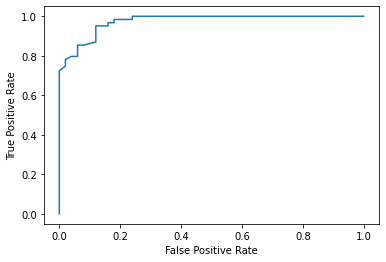

0.9743902439024391

In [19]:
tuned_rf = clf
clf.fit(X_train_rf, y_train_rf)
test_model(clf, y_test_rf, X_test_rf)

# XgBoost

https://practicaldatascience.co.uk/machine-learning/how-to-create-a-classification-model-using-xgboost

In [12]:
# for readibility 
y_train_xgb = y_train
y_test_xgb = y_test
X_train_xgb = X_train
X_test_xgb = X_test

## Create model

In [14]:
# X_train_xgb.columns = X_train_xgb.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))
# X_test_xgb.columns = X_test_xgb.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

xgb = XGBClassifier(random_state=SEED, learning_rate=0.1, n_estimators=100, reg_lambda=0.2, reg_alpha=0.4, eta=0.3)
xgb.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [15]:
xgb.fit(X_train_xgb, y_train_xgb)
test_model_cross_val(xgb, y_train_xgb, X_train_xgb, k=5, verbose=True)

AVERAGE CV=5 ROC_AUC (TEST): 0.9689089878375594
AVERAGE CV=5 STD (TEST): 0.0018581859103573854


ROC_AUC (TEST): 0.9747967479674797


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

       False       0.87      0.90      0.88        50
        True       0.96      0.94      0.95       123

    accuracy                           0.93       173
   macro avg       0.91      0.92      0.92       173
weighted avg       0.93      0.93      0.93       173



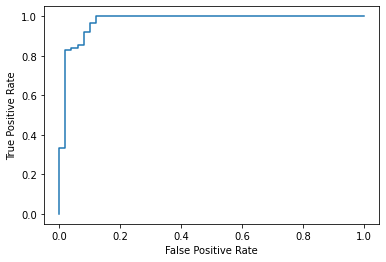

0.9747967479674797

In [16]:
xgb.fit(X_train_xgb, y_train_xgb)
test_model(xgb, y_test_xgb, X_test_xgb)